In [61]:
#Import libraries
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import warnings
from scipy.stats import ttest_ind
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv("cell2celltrain.csv")
df.head(5)

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [53]:
df.shape

(51047, 58)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [55]:
df.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

##### <b>COLUMNS DESCRIPTION</b>
* <b>CustomerID</b>: Unique identifier for each customer. 
* <b>Churn</b>: Indicates whether the customer has churned (cancelled or terminated their service) or not.
* <b>MonthlyRevenue</b>: The total revenue generated from the customer's account in a month.
* <b>MonthlyMinutes</b>: The total number of minutes the customer used in a month.
* <b>TotalRecurringCharge</b>: The total charge for recurring services (e.g., monthly plan charges) in a month.
* <b>DirectorAssistedCalls</b>: Number of calls that were assisted by a director.
* <b>OverageMinutes</b>: The total number of minutes exceeding the customer's plan allowance, resulting in overage charges.
* <b>oamingCalls</b>: Number of calls made while roaming outside the home service area.
* <b>PercChangeMinutes</b>: Percentage change in minutes compared to the previous month.
* <b>PercChangeRevenues</b>: Percentage change in revenue compared to the previous month.
* <b>DroppedCalls</b>: Number of calls that were dropped or disconnected unexpectedly.
* <b>BlockedCalls</b>: Number of calls that were blocked or prevented from going through.
* <b>UnansweredCalls</b>: Number of calls that were not answered by the customer.
* <b>CustomerCareCalls</b>: Number of calls made to customer care or support.
* <b>ThreewayCalls</b>: Number of calls where three parties were involved (e.g., conference calls).
* <b>ReceivedCalls</b>: Number of incoming calls received by the customer.
* <b>OutboundCalls</b>: Number of outgoing calls made by the customer.
* <b>InboundCalls</b>: Number of incoming calls made to the customer.
* <b>PeakCallsInOut</b>: Number of calls made during peak hours.
* <b>OffPeakCallsInOut</b>: Number of calls made during off-peak hours.
* <b>DroppedBlockedCalls</b>: Number of calls that were both dropped and blocked.
* <b>CallForwardingCalls</b>: Number of calls forwarded to another number.
* <b>CallWaitingCalls</b>: Number of calls where call waiting was used.
* <b>MonthsInService</b>: Number of months the customer has been using the service.
* <b>UniqueSubs</b>: Number of unique subscribers associated with the customer's account.
* <b>ActiveSubs</b>: Number of active subscribers on the customer's account.
* <b>ServiceArea</b>: The geographic area where the service is provided to the customer.
* <b>Handsets</b>: Total number of handsets associated with the customer's account.
* <b>HandsetModels</b>: Number of different handset models used by the customer.
* <b>CurrentEquipmentDays</b>: Number of days the customer's current equipment has been in use.
* <b>AgeHH1</b>: Age of the head of the household (1).
* <b>AgeHH2</b>: Age of the head of the household (2).
* <b>ChildrenInHH</b>: Indicates whether there are children in the household.
* <b>HandsetRefurbished</b>: Indicates whether the handset is refurbished or not.
* <b>HandsetWebCapable</b>: Indicates whether the handset is capable of web browsing.
* <b>TruckOwner</b>: Indicates whether the customer owns a truck.
* <b>RVOwner</b>: Indicates whether the customer owns an RV (recreational vehicle).
* <b>Homeownership</b>: Indicates whether the customer owns a home.
* <b>BuysViaMailOrder</b>: Indicates whether the customer buys via mail order.
* <b>RespondsToMailOffers</b>: Indicates whether the customer responds to mail offers.
* <b>OptOutMailings</b>: Indicates whether the customer has opted out of receiving mailings.
* <b>NonUSTravel</b>: Indicates whether the customer travels outside the US.
* <b>OwnsComputer</b>: Indicates whether the customer owns a computer.
* <b>HasCreditCard</b>: Indicates whether the customer has a credit card.
* <b>RetentionCalls</b>: Number of calls made for customer retention purposes.
* <b>RetentionOffersAccepted</b>: Number of retention offers accepted by the customer.
* <b>NewCellphoneUser</b>: Indicates whether the customer is a new cellphone user.
* <b>NotNewCellphoneUser</b>: Indicates whether the customer is not a new cellphone user.
* <b>ReferralsMadeBySubscriber</b>: Number of referrals made by the customer.
* <b>IncomeGroup</b>: Indicates the income group of the customer.
* <b>OwnsMotorcycle</b>: Indicates whether the customer owns a motorcycle.
* <b>AdjustmentsToCreditRating</b>: Indicates any adjustments made to the customer's credit rating.
* <b>HandsetPrice</b>: The price of the handset.
* <b>MadeCallToRetentionTeam</b>: Indicates whether the customer made a call to the retention team.
* <b>CreditRating</b>: The credit rating of the customer.
* <b>PrizmCode</b>: A code representing the customer's demographic profile.
* <b>Occupation</b>: The occupation of the customer.
* <b>MaritalStatus</b>: The marital status of the customer.

In [56]:
import plotly.graph_objects as go
labels = df['Churn'].value_counts().rename(index={"No":"Non-churned customer", "Yes": "Churned customer"}).index 
values = df['Churn'].value_counts()
colors = ["green", "red"]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4,marker=dict(colors=colors))])
fig.update_layout(
    autosize=False,
    width=700,
    height=700
)
fig.show()

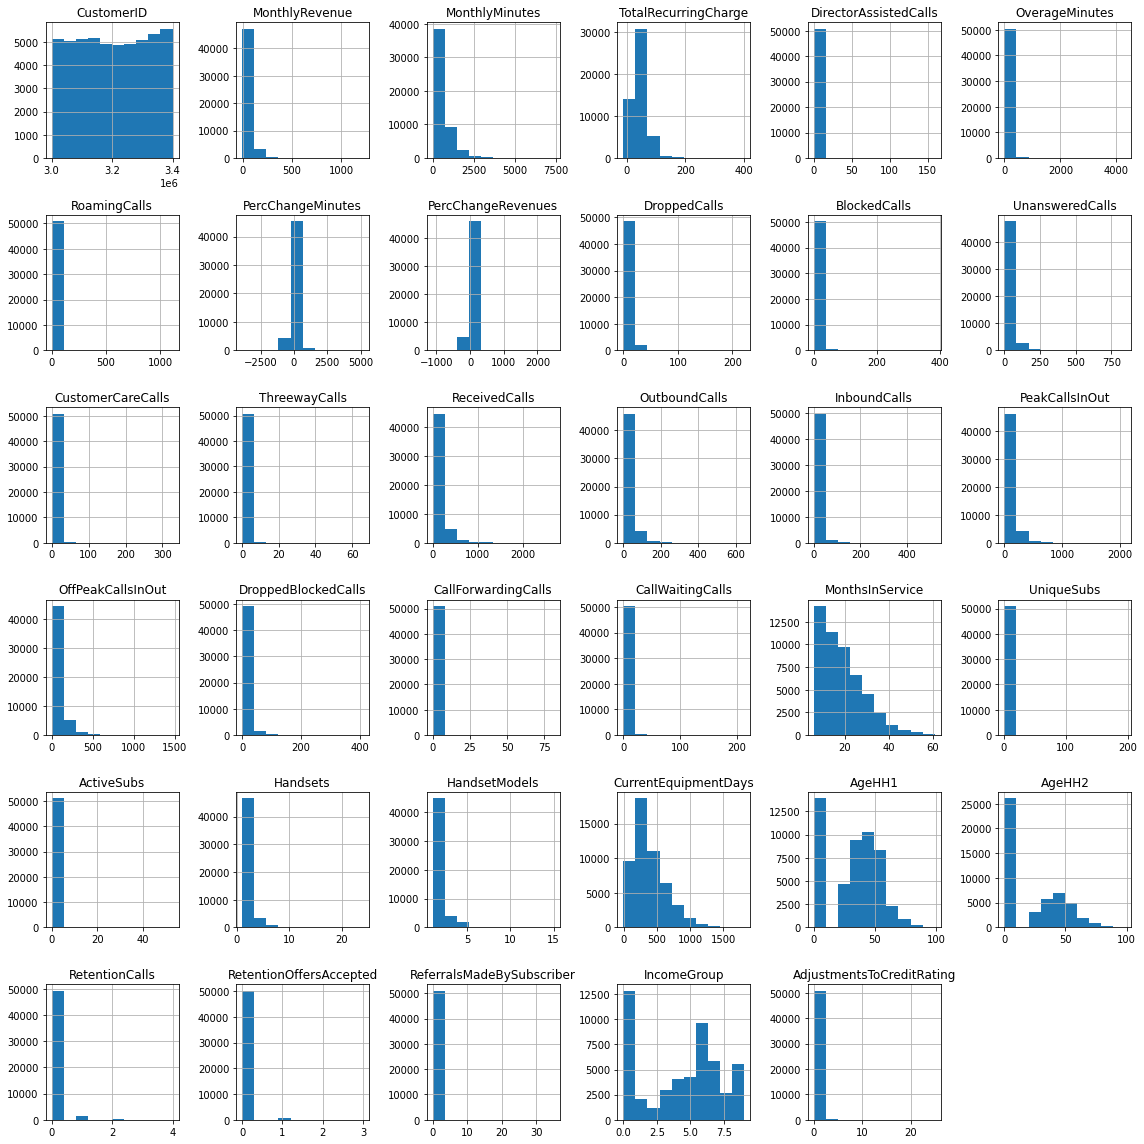

In [57]:
df.hist(figsize=(16,16))
plt.tight_layout()
plt.show()

In [58]:
df.isna().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

In [59]:
total_records = len(df)
records_with_missing_values = df.isnull().any(axis=1).sum()
percentage_missing_values = (records_with_missing_values / total_records) * 100
percentage_missing_values

2.5368777793014283

<AxesSubplot:>

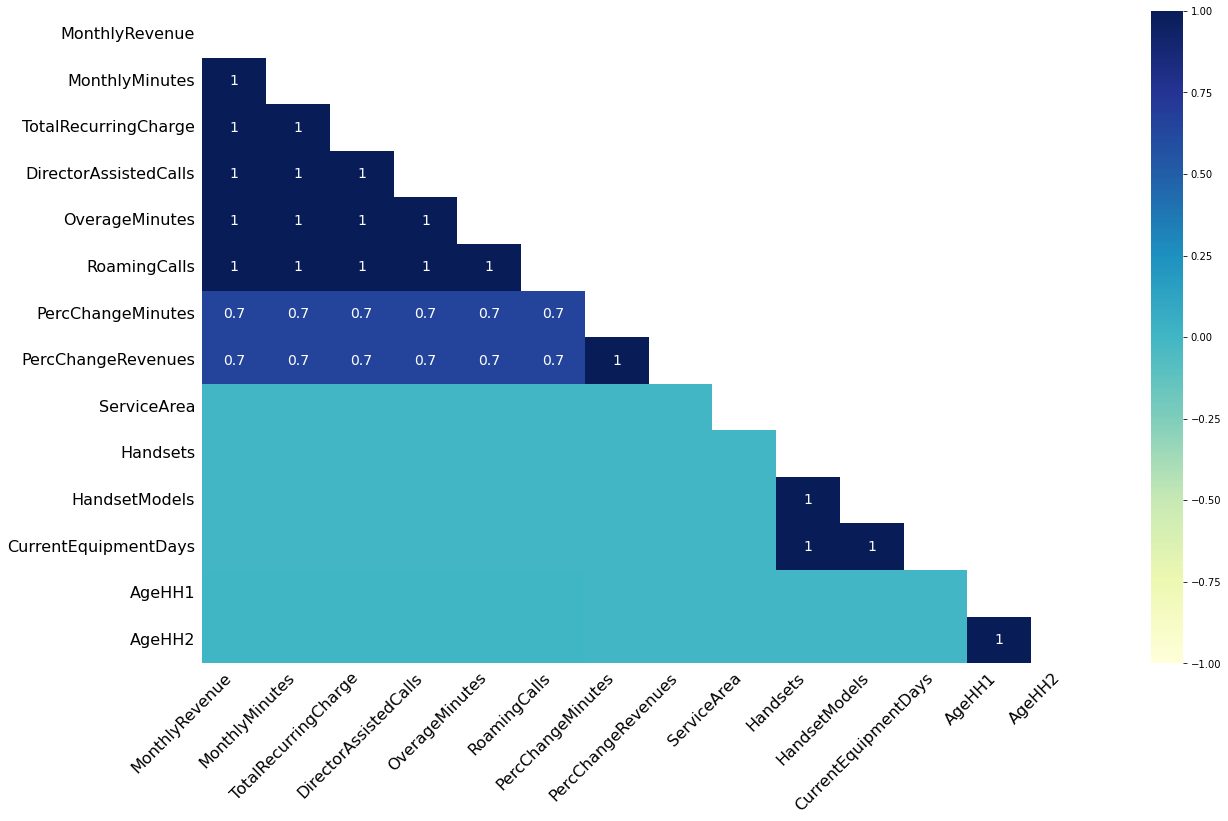

In [62]:
msno.heatmap(df, cmap='YlGnBu')

In [63]:
# Check the object type number of unique values
df.drop(columns=df.describe().columns).nunique()

Churn                        2
ServiceArea                747
ChildrenInHH                 2
HandsetRefurbished           2
HandsetWebCapable            2
TruckOwner                   2
RVOwner                      2
Homeownership                2
BuysViaMailOrder             2
RespondsToMailOffers         2
OptOutMailings               2
NonUSTravel                  2
OwnsComputer                 2
HasCreditCard                2
NewCellphoneUser             2
NotNewCellphoneUser          2
OwnsMotorcycle               2
HandsetPrice                16
MadeCallToRetentionTeam      2
CreditRating                 7
PrizmCode                    4
Occupation                   8
MaritalStatus                3
dtype: int64

In [7]:
quantitative_columns = df.describe().columns
quantitative_columns

Index(['CustomerID', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls',
       'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'AdjustmentsToCreditRating'],
      dtype='object')

In [8]:
qualitative_columns = df.drop(columns=quantitative_columns).columns
qualitative_columns

Index(['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')

In [12]:
df['PrizmCode'].value_counts()

Other       24655
Suburban    16378
Town         7589
Rural        2425
Name: PrizmCode, dtype: int64

In [13]:
df['CreditRating'].value_counts()

2-High       18993
1-Highest     8522
3-Good        8410
5-Low         6499
4-Medium      5357
7-Lowest      2114
6-VeryLow     1152
Name: CreditRating, dtype: int64

In [14]:
def credit_as_int(df):
    return int(df['CreditRating'][0])
df['CreditRating'] = df.apply(credit_as_int,axis = 1)
df['CreditRating']

0        1
1        4
2        3
3        4
4        1
        ..
51042    1
51043    3
51044    5
51045    5
51046    5
Name: CreditRating, Length: 51047, dtype: int64

In [15]:
print(df['HandsetPrice'].unique())
# Replace the Unknown with 0, set the type to int
df['HandsetPrice'] = df['HandsetPrice'].replace('Unknown', 0).astype(int,errors='ignore')

['30' 'Unknown' '10' '80' '150' '300' '40' '200' '100' '130' '60' '400'
 '240' '250' '180' '500']


In [16]:
# the ServiceArea has large amount of unique value, but it isn't really meaningful 
print(df['ServiceArea'].value_counts().sort_values(ascending=False).head(20))

NYCBRO917    1684
HOUHOU281    1510
DALDAL214    1498
NYCMAN917    1182
APCFCH703     783
DALFTW817     782
SANSAN210     724
APCSIL301     670
SANAUS512     612
SFROAK510     605
SFRSFR415     565
NYCQUE917     533
ATLANE678     524
PHXPHX602     512
SFRSCL408     508
ATLATL678     507
STLSTL314     497
OHICOL614     486
MINMIN612     481
NEVLVS702     479
Name: ServiceArea, dtype: int64


In [17]:
df = df.drop(columns=['CustomerID','NotNewCellphoneUser','ServiceArea'])

In [18]:
df.dropna(inplace=True)

In [64]:
def detect_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (column < lower_bound) | (column > upper_bound)

# Detect and mark outliers
outliers = df[quantitative_columns].apply(detect_outliers)

# Analyze and handle outliers 
print("Outliers in each column:")
print(outliers.sum())

# Optionally, ark the outliers in the original DataFrame with a specific label, e.g., 'outlier'
df['outlier'] = outliers.any(axis=1)

Outliers in each column:
CustomerID                       0
MonthlyRevenue                2997
MonthlyMinutes                2567
TotalRecurringCharge           824
DirectorAssistedCalls         5530
OverageMinutes                5842
RoamingCalls                  8835
PercChangeMinutes             6807
PercChangeRevenues           13221
DroppedCalls                  3712
BlockedCalls                  5517
UnansweredCalls               3630
CustomerCareCalls             6721
ThreewayCalls                 4622
ReceivedCalls                 3641
OutboundCalls                 3342
InboundCalls                  4973
PeakCallsInOut                2803
OffPeakCallsInOut             3624
DroppedBlockedCalls           3936
CallForwardingCalls            234
CallWaitingCalls              7448
MonthsInService               1218
UniqueSubs                    1874
ActiveSubs                     611
Handsets                      4414
HandsetModels                 2008
CurrentEquipmentDays          

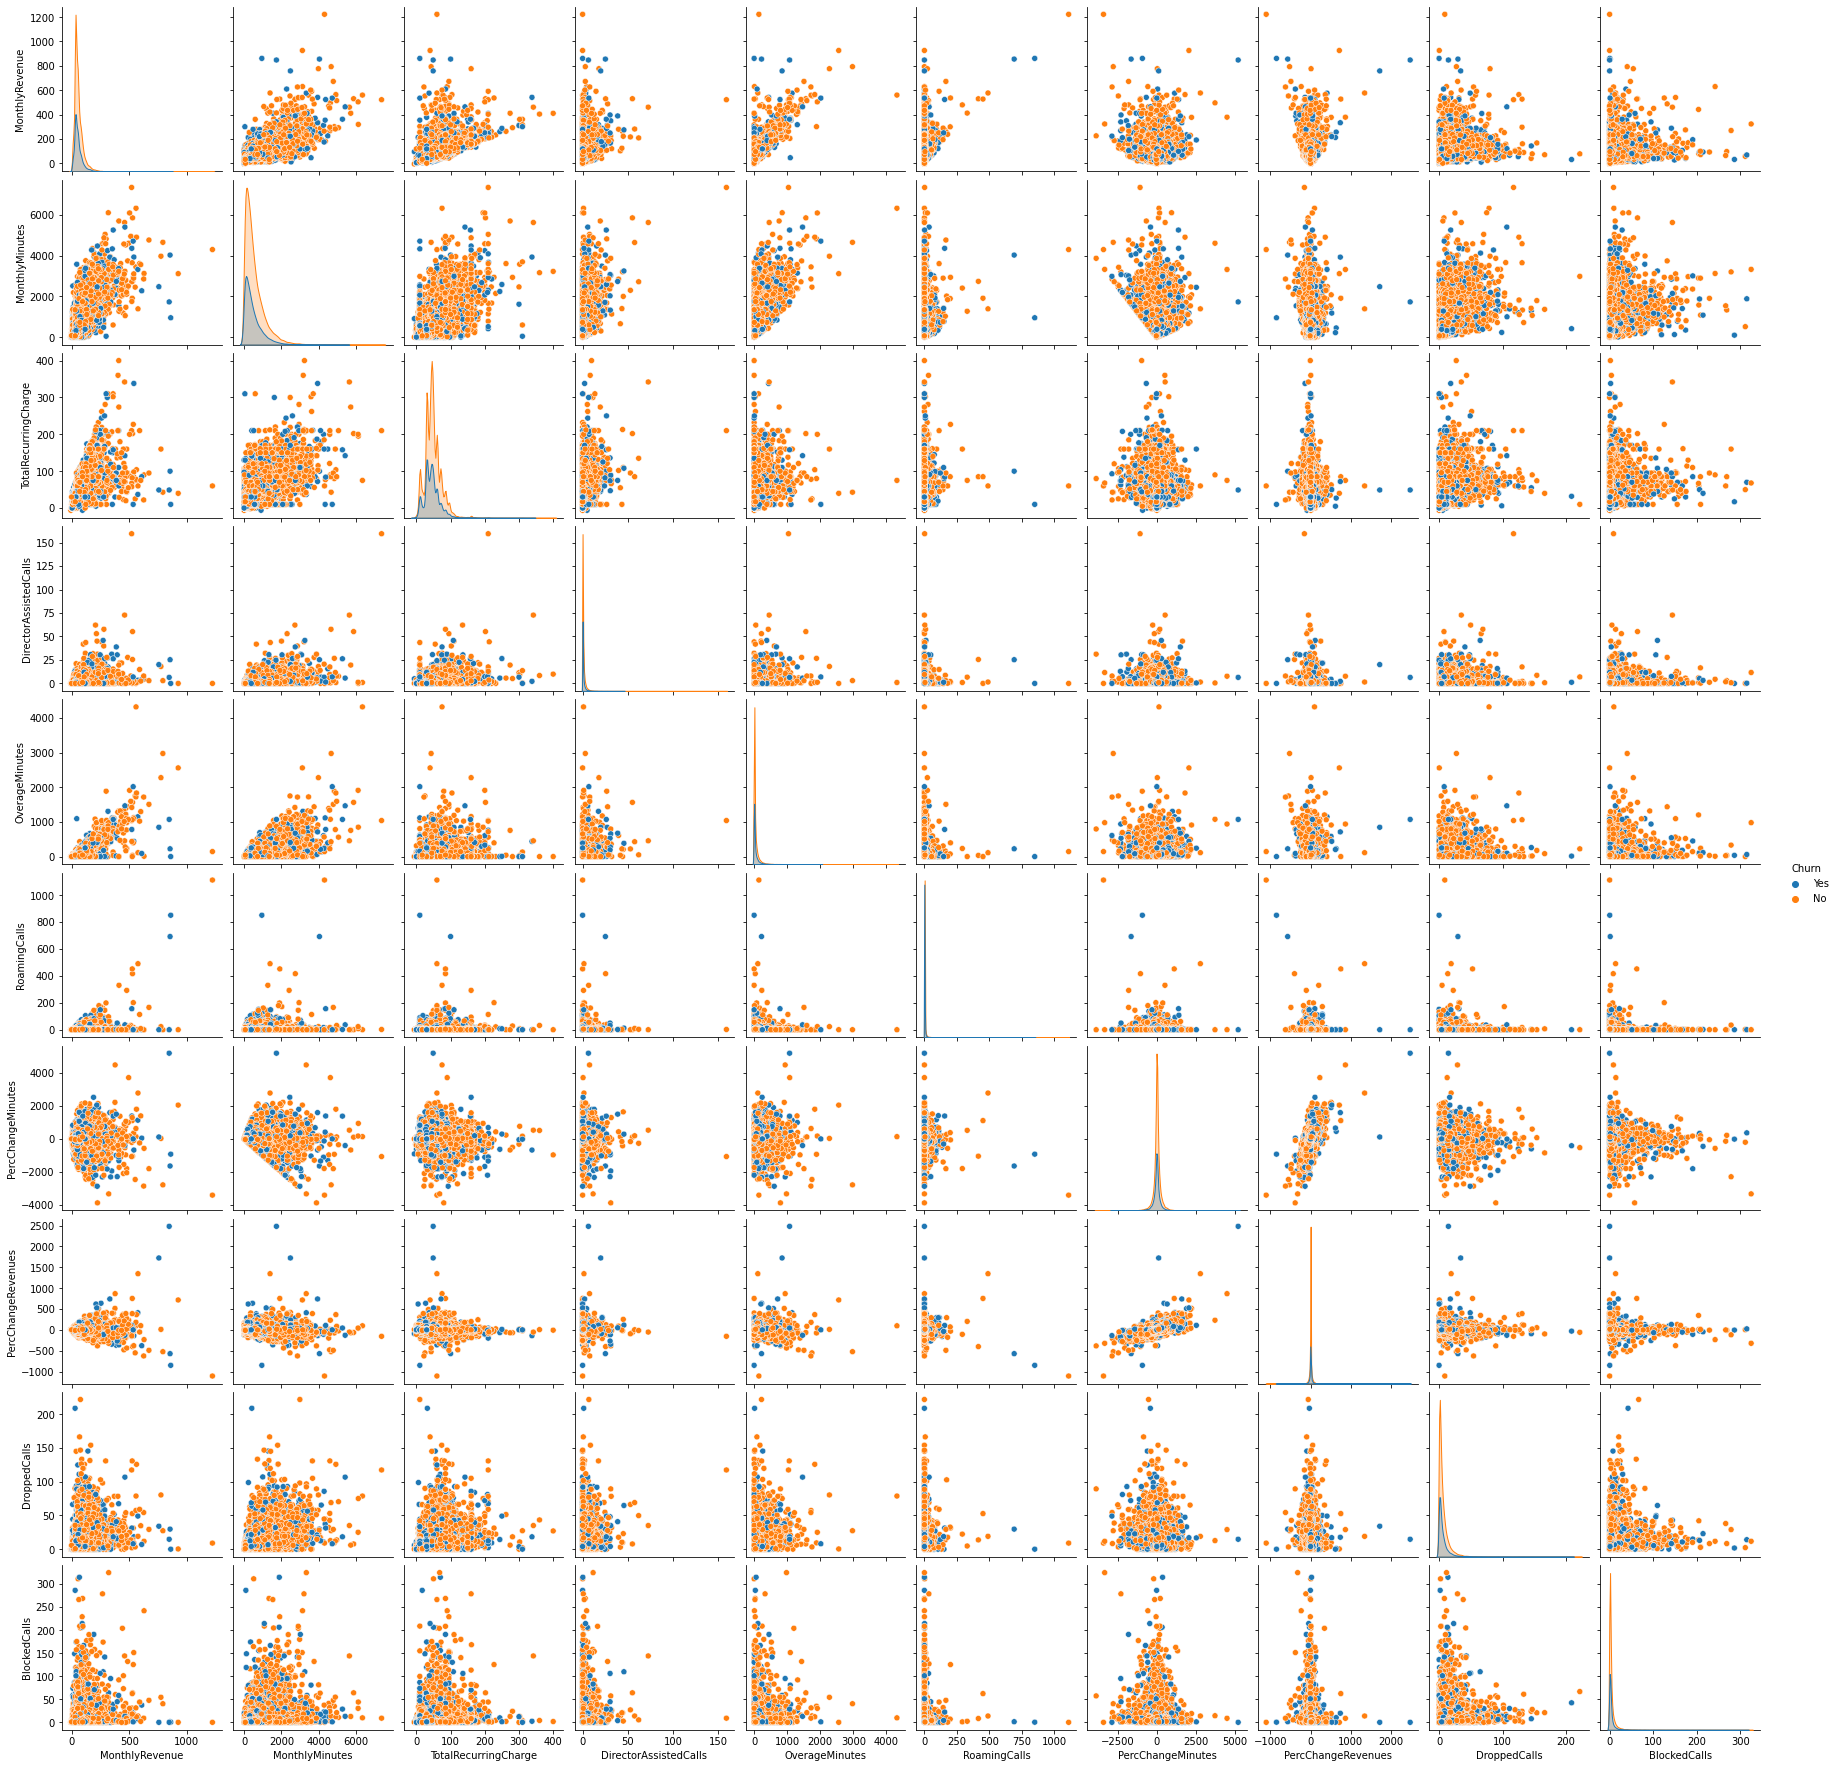

In [51]:
sns.pairplot(df.iloc[:,:11], hue='Churn')
plt.show()

In [19]:
X = pd.get_dummies(df.drop(columns = 'Churn'))
Y = df['Churn']
df = X.copy()
df['Churn'] = Y

In [20]:
churn_df = df[df['Churn'] == "Yes"]
rete_df = df[df['Churn'] == "No"]

In [21]:
results_df = pd.DataFrame(columns=['Column', 'T-Statistic', 'P-Value', 'Significant'])

# Perform the t-test for each column
for column in churn_df.describe().columns:
    churn_data = churn_df[column]
    rete_data = rete_df[column]

    # Perform the t-test
    t_stat, p_value = ttest_ind(churn_data, rete_data, equal_var=False)

    # Define the significance level (alpha)
    alpha = 0.1

    # Determine if the null hypothesis can be rejected
    if p_value < alpha:
        significant = True
    else:
        significant = False

    # Append the results to the results_df
    results_df = results_df.append({
        'Column': column,
        'T-Statistic': t_stat,
        'P-Value': p_value,
        'Significant': significant
    }, ignore_index=True)


In [22]:
column_difference = results_df[results_df['Significant'] == False]['Column'].to_list()
results_df[results_df['Significant'] == False]

,Column,T-Statistic,P-Value,Significant
9,BlockedCalls,-0.932799,0.350932,False
19,CallForwardingCalls,-0.892835,0.371951,False
42,TruckOwner_No,1.049762,0.293837,False
43,TruckOwner_Yes,-1.049762,0.293837,False
44,RVOwner_No,0.713828,0.47534,False
45,RVOwner_Yes,-0.713828,0.47534,False
52,OptOutMailings_No,-0.189375,0.8498,False
53,OptOutMailings_Yes,0.189375,0.8498,False
54,NonUSTravel_No,0.613003,0.53988,False
55,NonUSTravel_Yes,-0.613003,0.53988,False


In [23]:
churn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MonthlyRevenue,14257.0,57.876935,44.093285,2.54,32.63,47.61,69.75,861.11
MonthlyMinutes,14257.0,483.343130,502.438357,0.00,133.00,330.00,665.00,5410.00
TotalRecurringCharge,14257.0,44.619205,22.904099,-6.00,30.00,44.00,56.00,338.00
DirectorAssistedCalls,14257.0,0.823713,1.952142,0.00,0.00,0.25,0.74,45.79
OverageMinutes,14257.0,42.101564,91.312465,0.00,0.00,4.00,46.00,2018.00
...,...,...,...,...,...,...,...,...
Occupation_Self,14257.0,0.016694,0.128125,0.00,0.00,0.00,0.00,1.00
Occupation_Student,14257.0,0.008066,0.089452,0.00,0.00,0.00,0.00,1.00
MaritalStatus_No,14257.0,0.237357,0.425478,0.00,0.00,0.00,0.00,1.00
MaritalStatus_Unknown,14257.0,0.394052,0.488663,0.00,0.00,0.00,1.00,1.00


In [24]:
rete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MonthlyRevenue,35519.0,59.058930,44.400481,-6.17,34.06,48.72,71.445,1223.38
MonthlyMinutes,35519.0,541.829387,537.715859,0.00,170.00,380.00,742.000,7359.00
TotalRecurringCharge,35519.0,47.724429,24.036927,-6.00,30.00,45.00,60.000,400.00
DirectorAssistedCalls,35519.0,0.919470,2.324880,0.00,0.00,0.25,0.990,159.39
OverageMinutes,35519.0,38.820040,97.913691,0.00,0.00,2.00,38.000,4321.00
...,...,...,...,...,...,...,...,...
Occupation_Self,35519.0,0.017850,0.132407,0.00,0.00,0.00,0.000,1.00
Occupation_Student,35519.0,0.007404,0.085731,0.00,0.00,0.00,0.000,1.00
MaritalStatus_No,35519.0,0.259551,0.438395,0.00,0.00,0.00,1.000,1.00
MaritalStatus_Unknown,35519.0,0.366987,0.481990,0.00,0.00,0.00,1.000,1.00


In [25]:
difference_df = rete_df.describe().T - churn_df.describe().T 
difference_df

,count,mean,std,min,25%,50%,75%,max
MonthlyRevenue,21262.0,1.181995,0.307196,-8.71,1.43,1.11,1.695,362.27
MonthlyMinutes,21262.0,58.486257,35.277502,0.00,37.00,50.00,77.000,1949.00
TotalRecurringCharge,21262.0,3.105225,1.132828,0.00,0.00,1.00,4.000,62.00
DirectorAssistedCalls,21262.0,0.095757,0.372738,0.00,0.00,0.00,0.250,113.60
OverageMinutes,21262.0,-3.281524,6.601226,0.00,0.00,-2.00,-8.000,2303.00
...,...,...,...,...,...,...,...,...
Occupation_Self,21262.0,0.001156,0.004281,0.00,0.00,0.00,0.000,0.00
Occupation_Student,21262.0,-0.000662,-0.003721,0.00,0.00,0.00,0.000,0.00
MaritalStatus_No,21262.0,0.022194,0.012917,0.00,0.00,0.00,1.000,0.00
MaritalStatus_Unknown,21262.0,-0.027065,-0.006674,0.00,0.00,0.00,0.000,0.00


In [26]:
concatenated_df = pd.concat([rete_df.describe().T, churn_df.describe().T,difference_df, df.describe().T], axis=1)[['mean','std','50%']]#.drop(columns=['count','min','max'])
import itertools
count = itertools.count(1)
new_cols = [f"mean{next(count)}" if col == "mean" else col for col in concatenated_df.columns]
concatenated_df.columns = new_cols
concatenated_df.sort_values('mean3').head(5)

,mean1,mean2,mean3,mean4,std,std,std,std,50%,50%,50%,50%
CurrentEquipmentDays,363.623948,420.803395,-57.179447,380.001467,247.738303,258.758353,-11.020050,252.269511,310.0,366.0,-56.0,330.0
OverageMinutes,38.820040,42.101564,-3.281524,39.759945,97.913691,91.312465,6.601226,96.079857,2.0,4.0,-2.0,3.0
PercChangeRevenues,-1.495405,-0.353819,-1.141586,-1.168429,36.124684,46.538290,-10.413606,39.392630,-0.3,-0.3,0.0,-0.3
MonthsInService,18.622427,18.999649,-0.377222,18.730473,9.912378,9.285233,0.627144,9.738279,16.0,17.0,-1.0,16.0
RoamingCalls,1.158146,1.395532,-0.237386,1.226139,9.270688,11.149984,-1.879295,9.846157,0.0,0.0,0.0,0.0


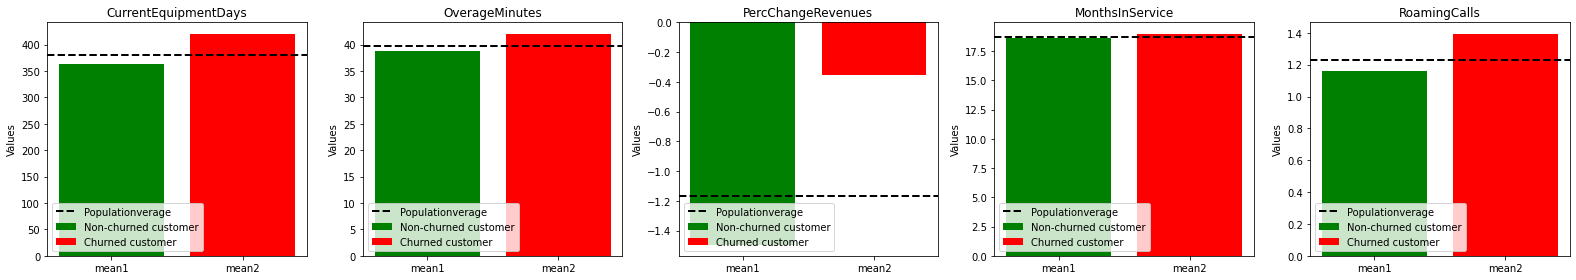

In [29]:

num_records = len(concatenated_df.sort_values('mean3').head(5))

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(22, 4))

for i in range(num_records):
    record_data = concatenated_df.sort_values('mean3').head(5).iloc[i]

    ax = axs[i]
    
    ax.bar(['mean1'], [record_data['mean1']], color='green', label='Non-churned customer')
    
    ax.bar(['mean2'], [record_data['mean2']], color='red', label='Churned customer')
    
    ax.axhline(y = record_data['mean4'], color='black', marker=None, linestyle='dashed', linewidth=2,label='Populationverage')
    
    ax.set_title(concatenated_df.sort_values('mean3').head(5).index[i])
    ax.set_ylabel("Values")
    
    ax.legend()

plt.tight_layout()

plt.show()

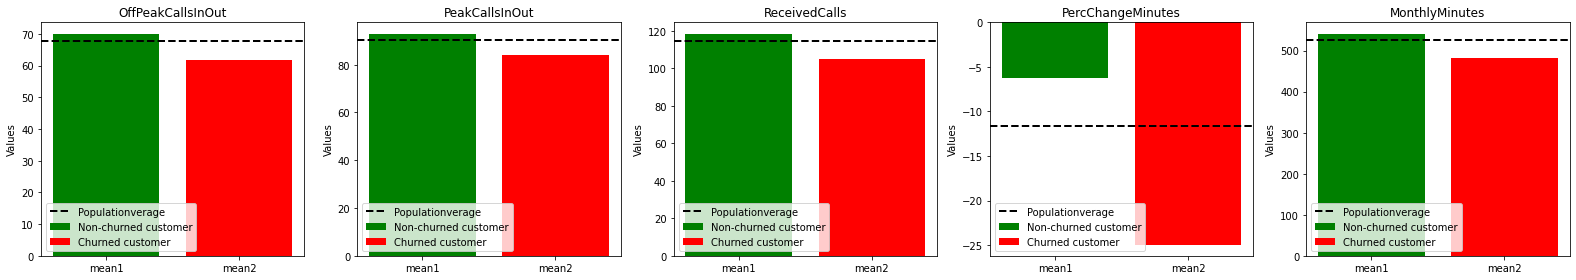

In [30]:

num_records = len(concatenated_df.sort_values('mean3').tail(5))

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(22, 4))

for i in range(num_records):
    record_data = concatenated_df.sort_values('mean3').tail(5).iloc[i]

    ax = axs[i]
    
    ax.bar(['mean1'], [record_data['mean1']], color='green', label='Non-churned customer')
    
    ax.bar(['mean2'], [record_data['mean2']], color='red', label='Churned customer')
    
    ax.axhline(y = record_data['mean4'], color='black', marker=None, linestyle='dashed', linewidth=2,label='Populationverage')
    
    ax.set_title(concatenated_df.sort_values('mean3').tail(5).index[i])
    ax.set_ylabel("Values")
    
    ax.legend()

plt.tight_layout()

plt.show()

In [29]:
concatenated_df.sort_values('mean3').tail(5)

,mean1,mean2,mean3,mean4,std,std,std,std,50%,50%,50%,50%
OffPeakCallsInOut,70.123438,61.758470,8.364969,67.727517,95.237213,85.931600,9.305614,92.743697,37.7,31.7,6.0,35.7
PeakCallsInOut,93.066170,83.935926,9.130244,90.451057,107.250705,97.325744,9.924961,104.584858,63.7,58.0,5.7,62.0
ReceivedCalls,118.627245,105.001915,13.625330,114.724634,169.309144,157.417571,11.891573,166.102897,56.0,45.5,10.5,52.9
PercChangeMinutes,-6.269687,-24.956513,18.686826,-11.622027,250.647049,267.898450,-17.251401,255.844020,-3.0,-10.0,7.0,-5.0
MonthlyMinutes,541.829387,483.343130,58.486257,525.077568,537.715859,502.438357,35.277502,528.509394,380.0,330.0,50.0,366.0


In [30]:
df[df['OverageMinutes']!=0].OverageMinutes.count()

27008

In [64]:
df.TotalRecurringCharge.describe()

count    49776.000000
mean        46.835021
std         23.759271
min         -6.000000
25%         30.000000
50%         45.000000
75%         60.000000
max        400.000000
Name: TotalRecurringCharge, dtype: float64

In [65]:
temp = df.nunique()
temp = temp[temp<10]
df[temp.index]

,RetentionCalls,RetentionOffersAccepted,CreditRating,ChildrenInHH_No,ChildrenInHH_Yes,HandsetRefurbished_No,HandsetRefurbished_Yes,HandsetWebCapable_No,HandsetWebCapable_Yes,TruckOwner_No,...,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes,Churn
0,1,0,1,1,0,1,0,0,1,1,...,0,0,1,0,0,0,1,0,0,Yes
1,0,0,4,0,1,1,0,1,0,1,...,0,0,1,0,0,0,0,0,1,Yes
2,0,0,3,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,No
3,0,0,4,1,0,1,0,0,1,1,...,0,1,0,0,0,0,1,0,0,No
4,0,0,1,1,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51035,0,0,2,0,1,1,0,0,1,1,...,0,0,1,0,0,0,1,0,0,No
51037,0,0,3,1,0,1,0,0,1,1,...,0,1,0,0,0,0,0,0,1,No
51040,0,0,1,1,0,1,0,1,0,1,...,0,0,1,0,0,0,0,1,0,No
51041,0,0,5,1,0,1,0,0,1,1,...,0,0,1,0,0,0,0,0,1,Yes


In [66]:
df.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes
count,49776.000000,49776.000000,49776.000000,49776.000000,49776.000000,49776.000000,49776.000000,49776.000000,49776.000000,49776.000000,...,49776.000000,49776.000000,49776.000000,49776.000000,49776.000000,49776.000000,49776.000000,49776.000000,49776.000000,49776.000000
mean,58.720379,525.077568,46.835021,0.892043,39.759945,1.226139,-11.622027,-1.168429,6.011116,4.079621,...,0.030296,0.003154,0.732582,0.174582,0.014605,0.017518,0.007594,0.253194,0.374739,0.372067
std,44.315490,528.509394,23.759271,2.224913,96.079857,9.846157,255.844020,39.392630,9.035817,10.838143,...,0.171402,0.056074,0.442617,0.379613,0.119968,0.131194,0.086813,0.434846,0.484060,0.483361
min,-6.170000,0.000000,-6.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.000000,0.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.380000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.910000,722.000000,60.000000,0.990000,40.000000,0.300000,65.000000,1.600000,7.700000,3.700000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,324.700000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, PredefinedSplit, train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTEN, SMOTENC
import warnings
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import pickle
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')

In [32]:
# x_columns = df.drop(columns=['Churn']).columns
def to_int_y(df):
    if df['Churn'] == "Yes":
        return 1
    else:
        return 0
Y = df.apply(to_int_y,axis=1).astype(np.float32)
scaler  = RobustScaler()
X = df.drop(columns=['Churn'])
X= scaler.fit_transform(X).astype(np.float32)
scaler  = StandardScaler()
X= scaler.fit_transform(X).astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,shuffle=True)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [i for i in range (2,20,2)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [i for i in range (2,20,2)]
weights_grid = np.linspace(0,1,50)
random_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(i) for i in np.linspace(0, 100, num = 11)],
    'min_samples_split': [int(i) for i in np.linspace(1, 21, num = 11)],
    'min_samples_leaf': [int(i) for i in np.linspace(1, 21, num = 11)],
    'class_weight': [{0:1-i, 1:i} for i in np.linspace(0, 1, num = 50)]
}
def Tuning(param_grid: dict, model, X_train: np.ndarray, X_test : np.ndarray, y_train: np.ndarray, y_test: np.ndarray) -> dict:
    """
    Return the best hyper-parameters based on model and provided param grid

    Args:
        param_grid (dict): dictionary of hyperparameters
        model (_type_): scikit learn model
        X_train (np.ndarray): X_train
        X_test (np.ndarray): X_test
        y_train (np.ndarray): y_train
        y_test (np.ndarray): y_test

    Returns:
        dict: the best hyper-parameters
    """
    model = model()
    cv_random = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 30, verbose=1, random_state=42, n_jobs = -1,scoring='recall_macro')
    cv_random.fit(X_train, y_train)
    return cv_random.best_params_

In [33]:
smote_model = SMOTE()
X_resampled, y_resampled = smote_model.fit_resample(X_train, y_train)
# Get the number of samples in the datasets
num_samples = len(X_resampled)
# Generate random indices for shuffling
shuffled_indices = np.random.permutation(num_samples)


# Shuffle X_train and Y_train using the shuffled indices
X_resampled = X_resampled[shuffled_indices]
y_resampled = y_resampled[shuffled_indices]
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
def draw_roc(result,y_test):
    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(result,y_test)

    # Compute the Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def build_model(model, random_grid: dict, smote: bool = False):
    """
    Build the most optimal Scikit-Learn machine learning model based on hyper-parameters grid

    Args:
        model (any): scikit learn model
        random_grid (dict): hyper-parameters grid
        X_train (np.ndarray): X_train
        X_test (np.ndarray): X_test
        y_train (np.ndarray): y_train
        y_test (np.ndarray): y_test

    Returns:
        scikit learn model: trained model with optimal hyperparameters
    """
    if smote:
        params = Tuning(random_grid, model, X_train,  X_test, y_train, y_test)
        print("End testing, the optimal hyper-parameters are: ", params)
        model = model(**params)
        model.fit(X_train, y_train)
    else:
        params = Tuning(random_grid, model, X_resampled, X_test, y_resampled, y_test)
        print("End testing, the optimal hyper-parameters are: ", params)
        model = model(**params)
        model.fit(X_resampled, y_resampled)

    result = model.predict(X_test)
    print(accuracy_score(result,y_test))
    print(classification_report(result,y_test))
    try:
        proba = model.predict_proba(X_test)
        draw_roc(y_test,proba[:,1:2])
    except:
        return model
    return model

<h3> GRADIENT BOOSING </h3>

Fitting 5 folds for each of 30 candidates, totalling 150 fits
End testing, the optimal hyper-parameters are:  {'subsample': 1.0, 'random_state': 42, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 7, 'learning_rate': 0.1}
0.7174568099638409
              precision    recall  f1-score   support

         0.0       0.95      0.73      0.83      9098
         1.0       0.16      0.55      0.25       858

    accuracy                           0.72      9956
   macro avg       0.55      0.64      0.54      9956
weighted avg       0.88      0.72      0.78      9956



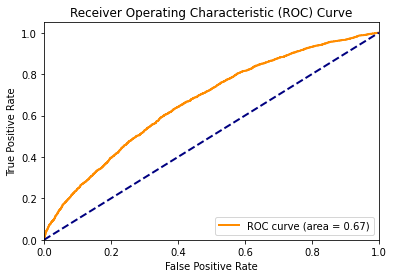

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
bst_params_grid = {
    'n_estimators': [50, 100, 200, 250, 300, 350, 400],         # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.5, 0.55, 0.6, 0.65],     # Step size shrinks the contribution of each tree
    'max_depth': [3, 5, 7],                # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10, 15, 20],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 0.9, 1.0],          # Fraction of samples used for fitting the trees
    'random_state': [42]                   # Seed for random number generator
}
bst_model = build_model(GradientBoostingClassifier,bst_params_grid)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
End testing, the optimal hyper-parameters are:  {'subsample': 0.9, 'random_state': 42, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.65}
0.7042989152269988
              precision    recall  f1-score   support

         0.0       0.90      0.74      0.81      8561
         1.0       0.23      0.49      0.32      1395

    accuracy                           0.70      9956
   macro avg       0.57      0.61      0.56      9956
weighted avg       0.81      0.70      0.74      9956



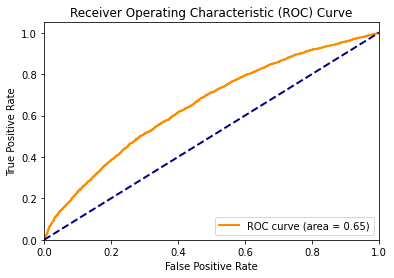

In [72]:
bst_model = build_model(GradientBoostingClassifier,bst_params_grid, smote = True)

<h3> KERNEL SUPPORT VECTOR MACHINE </h3>

Fitting 5 folds for each of 30 candidates, totalling 150 fits
End testing, the optimal hyper-parameters are:  {'tol': 0.0001, 'shrinking': True, 'probability': True, 'max_iter': 2000, 'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'coef0': 0.0, 'class_weight': {0: 0.3469387755102041, 1: 0.653061224489796}, 'C': 10}
0.5612695861791884
              precision    recall  f1-score   support

         0.0       0.63      0.71      0.67      6257
         1.0       0.38      0.30      0.34      3699

    accuracy                           0.56      9956
   macro avg       0.51      0.51      0.51      9956
weighted avg       0.54      0.56      0.55      9956



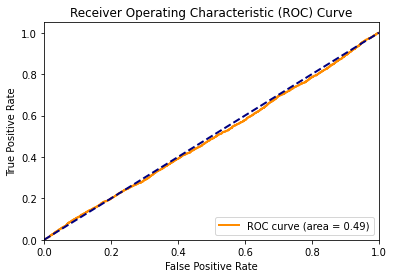

In [73]:
from sklearn.svm import SVC

k_svm_params_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],    # Regularization parameter
    'kernel': ['rbf', 'poly', 'sigmoid'],   # Kernel type: rbf, polynomial, or sigmoid
    'degree': [2, 3, 4],                    # Degree of the polynomial kernel
    'gamma': ['scale', 'auto', 0.1, 0.01],  # Kernel coefficient for 'rbf', 'poly', 'sigmoid'
    'coef0': [0.0, 0.5, 1.0],               # Independent term in 'poly' and 'sigmoid'
    'shrinking': [True, False],             # Whether to use shrinking heuristic
    'tol': [1e-3, 1e-4, 1e-5],              # Tolerance for stopping criterion
    'max_iter': [1000, 2000, 3000],          # Maximum number of iterations
    'class_weight': [{0:x, 1:1.0-x} for x in weights_grid],
    'probability': [True]
}

svc_model = build_model(SVC,k_svm_params_grid)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
End testing, the optimal hyper-parameters are:  {'tol': 0.001, 'shrinking': True, 'probability': True, 'max_iter': 2000, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 4, 'coef0': 0.0, 'class_weight': {0: 0.36734693877551017, 1: 0.6326530612244898}, 'C': 100}
0.5393732422659703
              precision    recall  f1-score   support

         0.0       0.56      0.72      0.63      5477
         1.0       0.48      0.31      0.38      4479

    accuracy                           0.54      9956
   macro avg       0.52      0.52      0.51      9956
weighted avg       0.53      0.54      0.52      9956



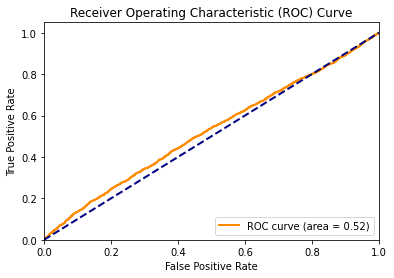

In [74]:
svc_model = build_model(SVC,k_svm_params_grid, smote = True)

<h3> LINEAR SUPPORT VECTOR MACHINE </h3>

In [34]:
from sklearn.svm import LinearSVC

svc_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],    # Regularization parameter
    'loss': ['hinge', 'squared_hinge'],     # Loss function
    'penalty': ['l1', 'l2'],                # Penalty norm ('l1' or 'l2')
    'dual': [True, False],                  # Use dual or primal optimization
    'tol': [1e-3, 1e-4, 1e-5],              # Tolerance for stopping criterion
    'max_iter': [1000, 2000, 3000],          # Maximum number of iterations
    'class_weight': [{0:x, 1:1.0-x} for x in weights_grid]
}

svc_model = build_model(LinearSVC,svc_param_grid)
# pickle.dump(svc_model,open("svc_model.sav","wb"))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
End testing, the optimal hyper-parameters are:  {'tol': 1e-05, 'penalty': 'l1', 'max_iter': 2000, 'loss': 'squared_hinge', 'dual': False, 'class_weight': {0: 0.4897959183673469, 1: 0.5102040816326531}, 'C': 0.01}
0.558256327842507
              precision    recall  f1-score   support

         0.0       0.52      0.78      0.63      4737
         1.0       0.64      0.35      0.46      5219

    accuracy                           0.56      9956
   macro avg       0.58      0.57      0.54      9956
weighted avg       0.59      0.56      0.54      9956



In [35]:
svc_model = build_model(LinearSVC,svc_param_grid, smote = True)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
End testing, the optimal hyper-parameters are:  {'tol': 0.0001, 'penalty': 'l2', 'max_iter': 3000, 'loss': 'squared_hinge', 'dual': True, 'class_weight': {0: 0.22448979591836732, 1: 0.7755102040816326}, 'C': 0.01}
0.43099638408999597
              precision    recall  f1-score   support

         0.0       0.26      0.82      0.39      2196
         1.0       0.87      0.32      0.47      7760

    accuracy                           0.43      9956
   macro avg       0.56      0.57      0.43      9956
weighted avg       0.73      0.43      0.45      9956



<h3> K-NEAREST NEIGHBOR </h3>

Fitting 5 folds for each of 30 candidates, totalling 150 fits
End testing, the optimal hyper-parameters are:  {'weights': 'distance', 'p': 1, 'n_neighbors': 5, 'leaf_size': 20, 'algorithm': 'auto'}
0.5586580956207312
              precision    recall  f1-score   support

         0.0       0.59      0.74      0.66      5703
         1.0       0.48      0.32      0.38      4253

    accuracy                           0.56      9956
   macro avg       0.53      0.53      0.52      9956
weighted avg       0.54      0.56      0.54      9956



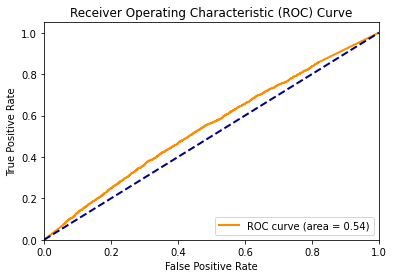

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': [10, 20, 30, 40]
}
knn_model = build_model(KNeighborsClassifier,knn_param_grid)
# pickle.dump(knn_model,open("knn_model.sav","wb"))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
End testing, the optimal hyper-parameters are:  {'weights': 'uniform', 'p': 1, 'n_neighbors': 3, 'leaf_size': 10, 'algorithm': 'brute'}
0.6446364001607071
              precision    recall  f1-score   support

         0.0       0.82      0.72      0.77      8043
         1.0       0.21      0.32      0.26      1913

    accuracy                           0.64      9956
   macro avg       0.52      0.52      0.51      9956
weighted avg       0.70      0.64      0.67      9956



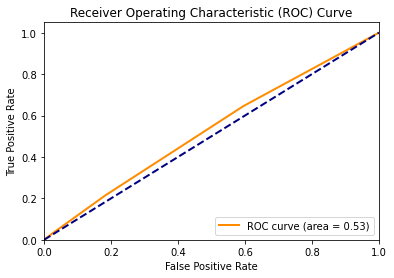

In [35]:
knn_model = build_model(KNeighborsClassifier,knn_param_grid, smote = True)

<h3> STACKING ENSEMBLE </h3>

In [36]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [37]:
base_model = [('lr', GradientBoostingClassifier(**{'subsample': 0.8, 'random_state': 42, 'n_estimators': 400, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.55})),
              ('rf', RandomForestClassifier(**{'min_samples_split': 8, 'min_samples_leaf': 16, 'max_features': 'sqrt', 'max_depth': 100, 'criterion': 'entropy', 'class_weight': {0: 0.1428571428571429, 1: 0.8571428571428571}})),
              ('svc', SVC(**{'tol': 0.0001, 'shrinking': True, 'probability': True, 'max_iter': 2000, 'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'coef0': 0.0, 'class_weight': {0: 0.3469387755102041, 1: 0.653061224489796}, 'C': 10})),
              ('knn',KNeighborsClassifier(**{'weights': 'uniform', 'p': 1, 'n_neighbors': 3, 'leaf_size': 10, 'algorithm': 'brute'}
))]
estimator = LogisticRegression(**{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 200, 'fit_intercept': False, 'class_weight': {0: 0.3469387755102041, 1: 0.653061224489796}, 'C': 10})
stacking_model = StackingClassifier(estimators=base_model, final_estimator=estimator)
stacking_model.fit(X_train,y_train)
result = stacking_model.predict(X_test)
print(accuracy_score(result,y_test))
print(classification_report(result,y_test))

0.6755725190839694
              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77      6883
         1.0       0.47      0.44      0.45      3073

    accuracy                           0.68      9956
   macro avg       0.61      0.61      0.61      9956
weighted avg       0.67      0.68      0.67      9956



In [38]:
stacking_model_smote = StackingClassifier(estimators=base_model, final_estimator=estimator)
stacking_model_smote.fit(X_resampled,y_resampled)
result = stacking_model_smote.predict(X_test)
print(accuracy_score(result,y_test))
print(classification_report(result,y_test))

0.6325833668139815
              precision    recall  f1-score   support

         0.0       0.70      0.76      0.73      6535
         1.0       0.46      0.38      0.42      3421

    accuracy                           0.63      9956
   macro avg       0.58      0.57      0.57      9956
weighted avg       0.62      0.63      0.62      9956



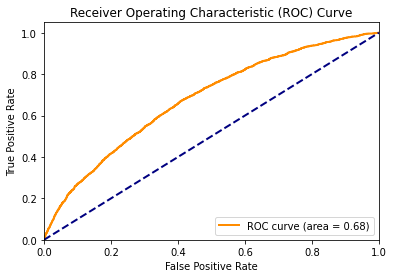

In [46]:
# Compute the ROC curve
proba = stacking_model.predict_proba(X_test)
draw_roc(y_test,proba[:,1:2])   


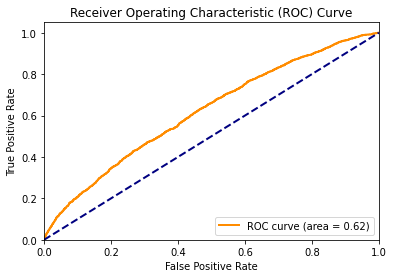

In [47]:
# Compute the ROC curve
proba = stacking_model_smote.predict_proba(X_test)
draw_roc(y_test,proba[:,1:2])
